# How to become an Airbnb Superhost?


### An Exploratory Data Analysis (EDA) of Aibnb Data from New York City

I systematically explored data collected from "New York", Inside Airbnb, http://insideairbnb.com/get-the-data.html and gained the following insights into what it takes to become an Airbnb Superhost.

# REPORT/ARTICLE

https://medium.com/@smartmomtt/how-to-become-an-airbnb-superhost-10d80a040c8

## Goal

We are going to focus on a question: which features are helpful for finding out the appropriate listing price?

## Load Data

In [122]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [123]:
listings = pd.read_csv('data/airbnb_nyc.csv')

In [124]:
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


In [50]:
type(listings)

pandas.core.frame.DataFrame

# Normalize Data

### Price was normalizd for size=accomodates and location=longitude. based on high correlation with price

In [125]:
price_accom=(listings['price']/listings['accommodates'])
loc_sum = listings['longitude']+listings['latitude']
price_accom_loc=price_accom/(loc_sum*loc_sum)
price_accom
price_accom_loc

0        0.067084
1        0.068319
2        0.043219
3        0.027023
4        0.036600
           ...   
30174    0.009878
30175    0.021078
30176    0.036221
30177    0.049798
30178    0.040764
Length: 30179, dtype: float64

In [126]:
listings.insert(1,'price_accom', price_accom)
listings.insert(1,'price_accom_loc', price_accom_loc)

In [127]:
list(listings.columns)

['id',
 'price_accom_loc',
 'price_accom',
 'name',
 'summary',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'house_rules',
 'host_id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'calculated_host_listings_count',
 'calculated_host_li

Please check out data dictionary [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896)

## Separate Numerical from Non-Numerical Data

**Q**: Which variables are string variables vs. numerical? Save the name of the numerical variables in a list named ```numerical_var```.

In [11]:
listings['accommodates'].dtypes

dtype('int64')

In [56]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   price_accom_loc                               30179 non-null  float64
 2   price_accom                                   30179 non-null  float64
 3   name                                          30166 non-null  object 
 4   summary                                       28961 non-null  object 
 5   description                                   29575 non-null  object 
 6   experiences_offered                           30179 non-null  object 
 7   neighborhood_overview                         18113 non-null  object 
 8   transit                                       18190 non-null  object 
 9   house_rules                                   16623 non-null 

In [57]:
numerical_var = list(listings.columns[(listings.dtypes!='object')])
numerical_var

['id',
 'price_accom_loc',
 'price_accom',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'brea

**Q**: Make a histogram for ```price``` variable.

# Basic histograms to understand trends

<AxesSubplot:>

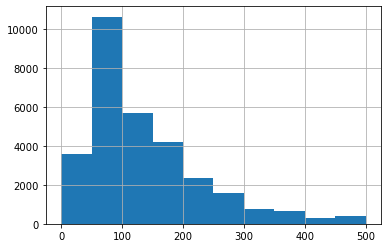

In [27]:
listings['price'].hist()


In [9]:
#plt.normalize(y)
#plt.hist()

<AxesSubplot:>

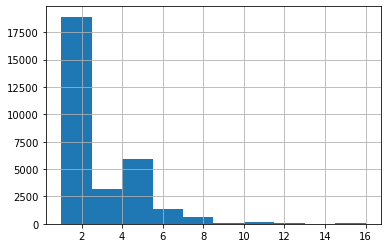

In [10]:
listings['accommodates'].hist()

### First attempt to normalize price

<AxesSubplot:>

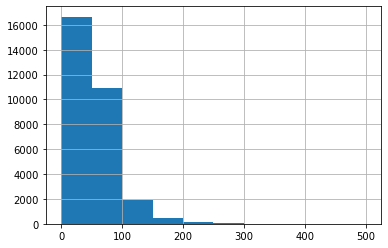

In [29]:
(listings['price']/listings['accommodates']).hist()

<AxesSubplot:>

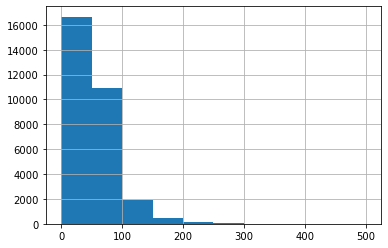

In [58]:
listings['price_accom'].hist()

<AxesSubplot:>

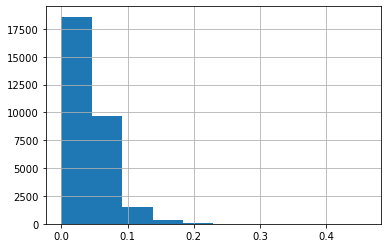

In [59]:
listings['price_accom_loc'].hist()

<AxesSubplot:>

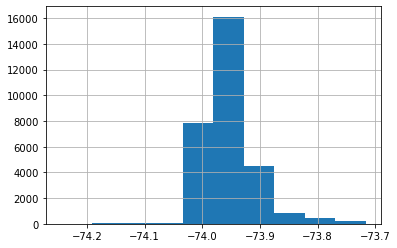

In [63]:
listings['longitude'].hist()

<AxesSubplot:>

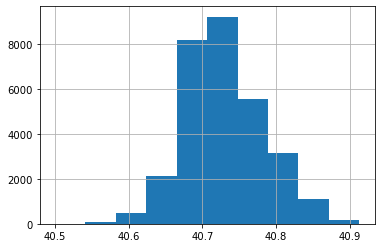

In [64]:
listings['latitude'].hist()

#### loc_sum does normalize the distribution of location - because latitde is naturally spreadout

<AxesSubplot:>

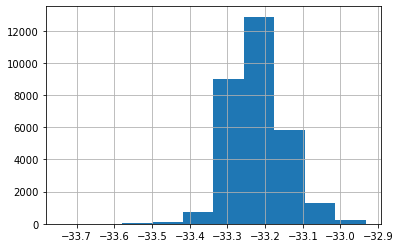

In [62]:
loc_sum.hist()

<AxesSubplot:>

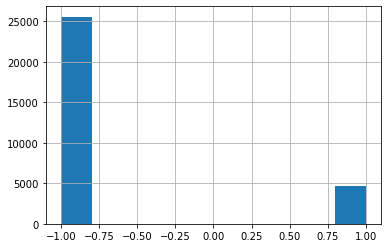

In [33]:
listings['long_term_stays'].hist()

# SUPERHOST OBSERVATIONS

## A - HISTOGRAMS

## Superhosts are responsive???

Summary of below results: https://docs.google.com/spreadsheets/d/1QjXSTLijmvaxipUHpPq2tv8YKOmaC3nXYw6SUxg9rUI/edit?usp=sharing

[None, None]

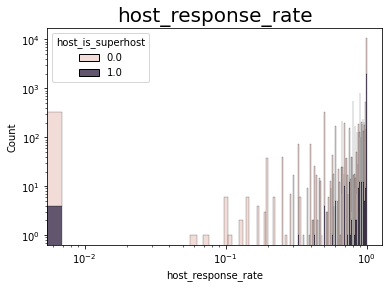

In [142]:
ax=sns.histplot(data=listings, x='host_response_rate', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="host_response_rate",
          fontsize=20)
ax.set(xscale="log", yscale="log")

#### remove zeros and 1's to see trend clearly....may not include in report

In [157]:
listings_new_host_response = listings.loc[(listings['host_response_rate'] != 0) & (listings['host_response_rate'] != 1)]

(0.0, 2500.0)

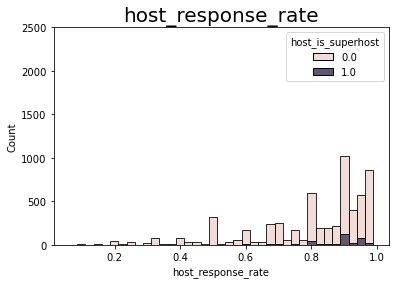

In [158]:
ax=sns.histplot(data=listings_new_host_response, x='host_response_rate', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="host_response_rate",
          fontsize=20)
plt.ylim(0, 2500)

(0.6, 1.2)

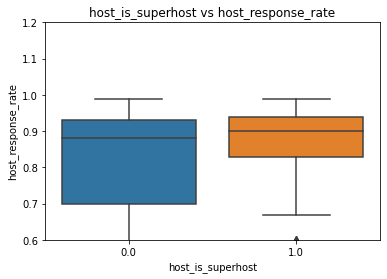

In [159]:
sns.boxplot(data=listings_new_host_response, x='host_is_superhost', y='host_response_rate')
plt.title('host_is_superhost vs host_response_rate')
plt.ylim(0.6, 1.2)

## Superhosts are flexible - long term stays allowed

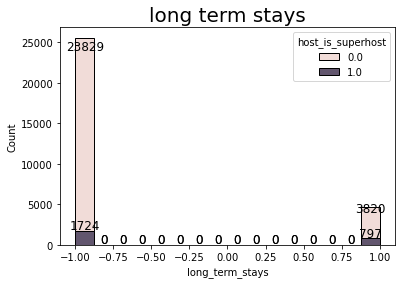

In [173]:
ax=sns.histplot(data=listings, x='long_term_stays', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="long term stays",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')





## Super host have the right ammenities!

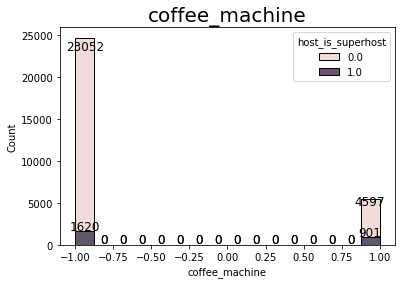

In [176]:
ax=sns.histplot(data=listings, x='coffee_machine', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="coffee_machine",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')


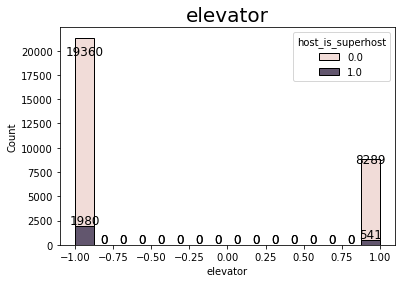

In [177]:
ax=sns.histplot(data=listings, x='elevator', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="elevator",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

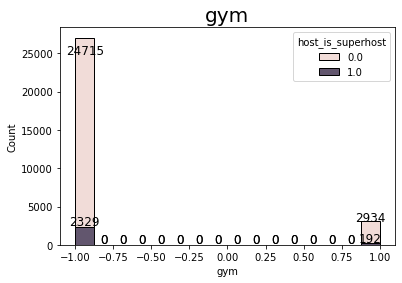

In [178]:
ax=sns.histplot(data=listings, x='gym', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="gym",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

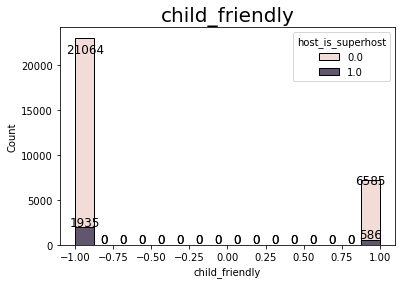

In [179]:
ax=sns.histplot(data=listings, x='child_friendly', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="child_friendly",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

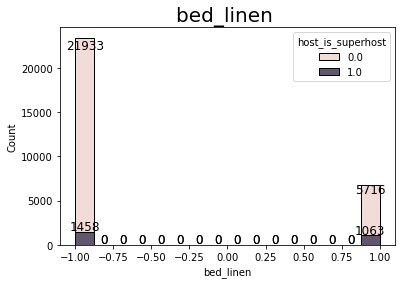

In [180]:
ax=sns.histplot(data=listings, x='bed_linen', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="bed_linen ",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

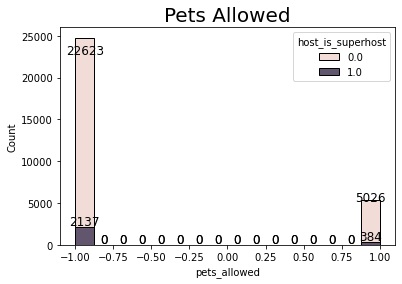

In [182]:
ax=sns.histplot(data=listings, x='pets_allowed', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="Pets Allowed",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

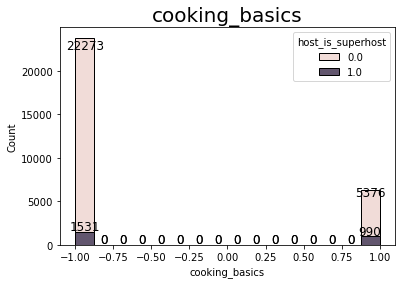

In [13]:
ax=sns.histplot(data=listings, x='cooking_basics', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="cooking_basics",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

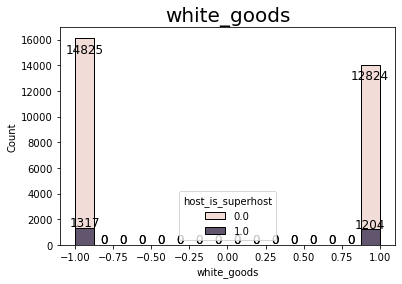

In [12]:
ax=sns.histplot(data=listings, x='white_goods', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="white_goods",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

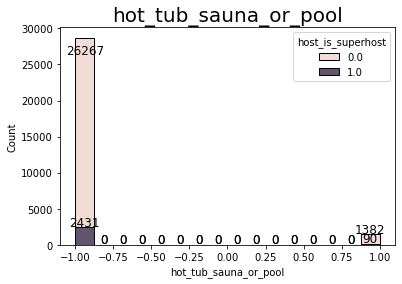

In [11]:
ax=sns.histplot(data=listings, x='hot_tub_sauna_or_pool', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="hot_tub_sauna_or_pool",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

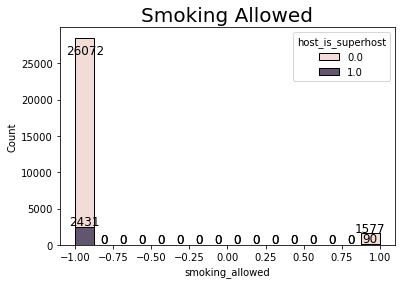

In [183]:
ax=sns.histplot(data=listings, x='smoking_allowed', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="Smoking Allowed",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

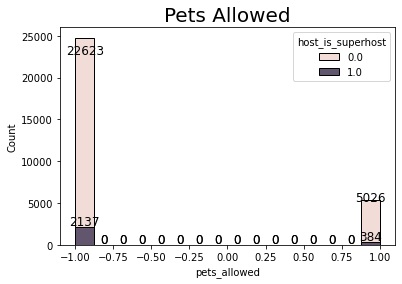

In [14]:
ax=sns.histplot(data=listings, x='pets_allowed', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="Pets Allowed",
          fontsize=20)

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

Text(0.5, 1.0, 'longitude')

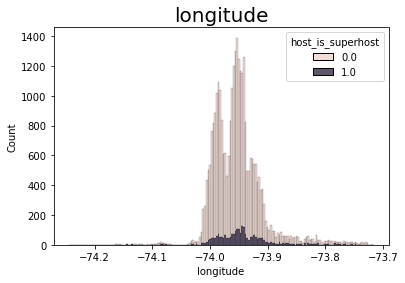

In [181]:
ax=sns.histplot(data=listings, x='longitude', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label="longitude",
          fontsize=20)


## How superhosts make money!

(0.0, 2500.0)

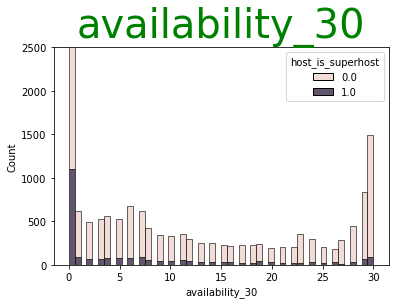

In [39]:
ax=sns.histplot(data=listings, x='availability_30', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label='availability_30',
          fontsize=40,
          color="green")
plt.ylim(0, 2500)

(0.0, 2500.0)

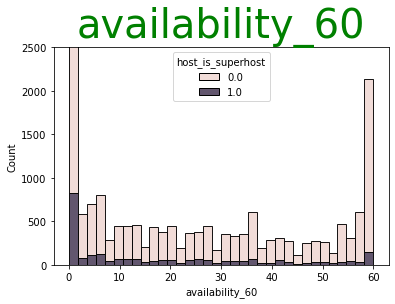

In [40]:
ax=sns.histplot(data=listings, x='availability_60', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label='availability_60',
          fontsize=40,
          color="green")
plt.ylim(0, 2500)

(0.0, 2500.0)

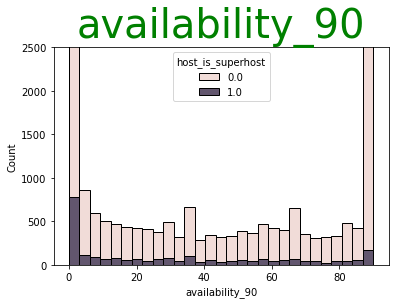

In [41]:
ax=sns.histplot(data=listings, x='availability_90', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.title(label='availability_90',
          fontsize=40,
          color="green")
plt.ylim(0, 2500)

## The zero values may not be accurate. May be the same as no entry

(0.0, 2500.0)

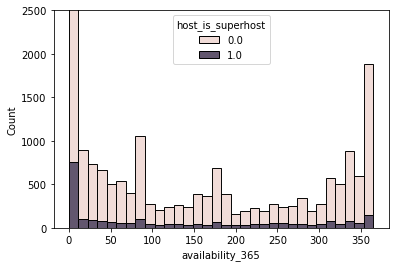

In [44]:
ax=sns.histplot(data=listings, x='availability_365', hue='host_is_superhost', multiple='stack')
# plot histogram 
plt.ylim(0, 2500)


## B - OTHER HISTPLOTS

<AxesSubplot:xlabel='rate_accom', ylabel='Count'>

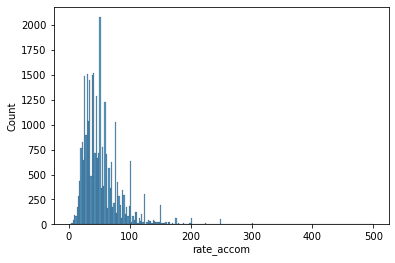

In [62]:
sns.histplot(data=listings, x='rate_accom')

<AxesSubplot:xlabel='price', ylabel='Count'>

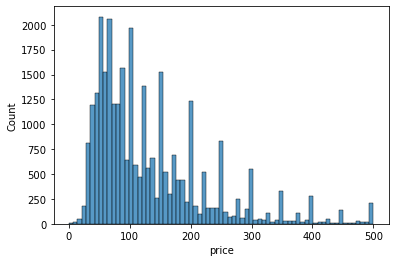

In [23]:
sns.histplot(data=listings, x='price')

**Q**: Make a histogram for ```price``` for listings that are ```long_term_stays``` vs. short-term. 

<AxesSubplot:xlabel='rate_accom', ylabel='Count'>

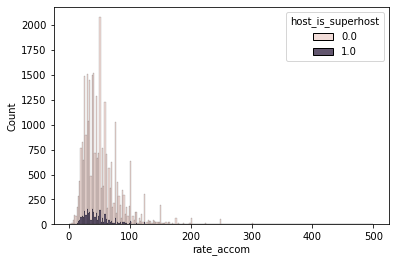

In [147]:
sns.histplot(data=listings, x='rate_accom', hue='host_is_superhost', multiple='stack')

<AxesSubplot:xlabel='price', ylabel='Count'>

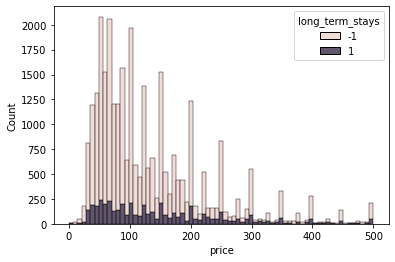

In [28]:
sns.histplot(data=listings, x='price', hue='long_term_stays', multiple='stack')

(0.0, 200.0)

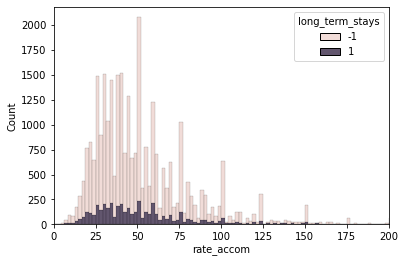

In [111]:
sns.histplot(data=listings, x='rate_accom', hue='long_term_stays', multiple='stack')
plt.xlim(0, 200)

<AxesSubplot:xlabel='price', ylabel='Count'>

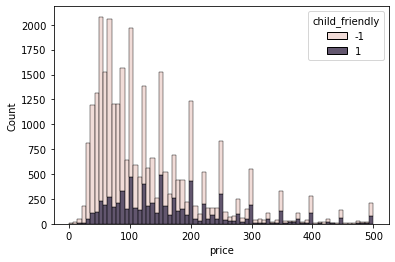

In [67]:
sns.histplot(data=listings, x='price', hue='child_friendly', multiple='stack')

(0.0, 200.0)

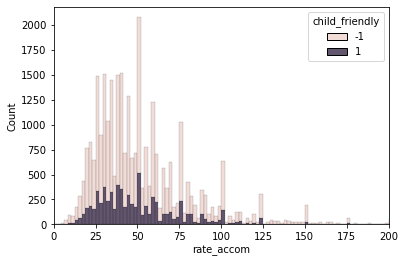

In [113]:
sns.histplot(data=listings, x='rate_accom', hue='child_friendly', multiple='stack')
plt.xlim(0, 200)

**Q**: Can you create box plots for prices for each number of bedrooms?

# MAJOR OBSERVATIONS

# 1. Price trends with accommodates

Text(0.5, 1.0, 'Boxplot of Accomodates vs Price')

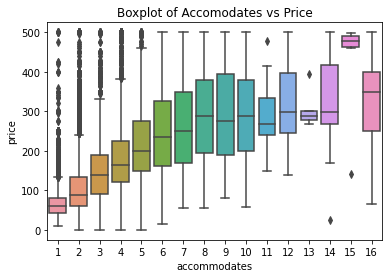

In [8]:
sns.boxplot(data=listings, x='accommodates', y='price')
plt.title('Boxplot of Accomodates vs Price')

###### This is why we used accommodates instead of number of bedrooms/beds

Text(0.5, 1.0, 'Boxplot of Bedrooms vs Price')

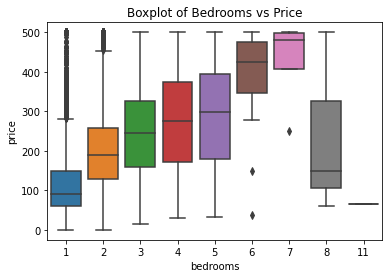

In [73]:
sns.boxplot(data=listings, x='bedrooms', y='price')
plt.title('Boxplot of Bedrooms vs Price')

Text(0.5, 1.0, 'Boxplot of Beds vs Price')

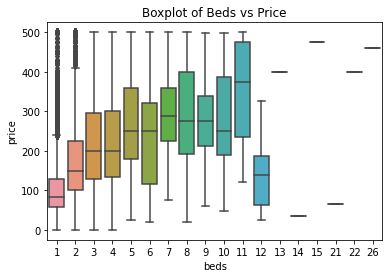

In [74]:
sns.boxplot(data=listings, x='beds', y='price')
plt.title('Boxplot of Beds vs Price')

### Child friendly normalizes with rental sizee (accommodates)

Text(0.5, 1.0, 'Child Friendly vs Price')

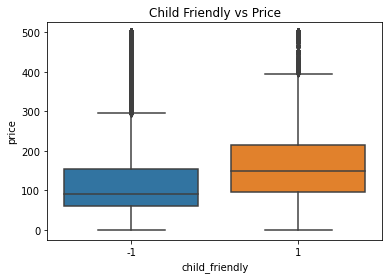

In [77]:
sns.boxplot(data=listings, x='child_friendly', y='price')
plt.title('Child Friendly vs Price')

Text(0.5, 1.0, 'Child Friendly vs Price_accom')

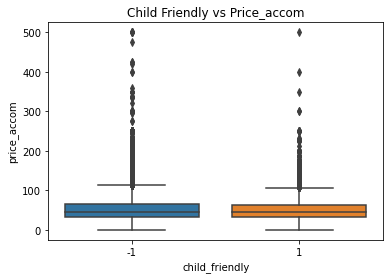

In [78]:
sns.boxplot(data=listings, x='child_friendly', y='price_accom')
plt.title('Child Friendly vs Price_accom')

### Also not considered as strongly related to accommodates

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

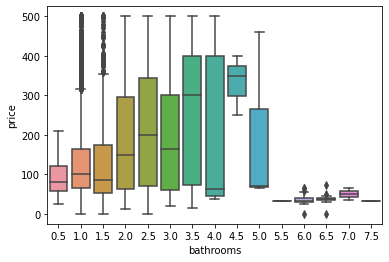

In [79]:
sns.boxplot(data=listings, x='bathrooms', y='price')

# 2. Max Price trends with Location being in centre of city
### Tried boxplots and histplots first but did not work
### you can get a range of prices at any location depending on ammenities provided. But the max possible you can charge depends on how close you are to the centre of NYC

<AxesSubplot:xlabel='longitude', ylabel='price_accom'>

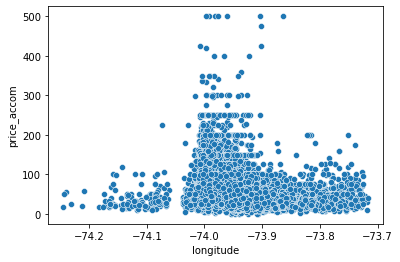

In [65]:
sns.scatterplot(data=listings, x='longitude', y='price_accom')


<AxesSubplot:xlabel='latitude', ylabel='price_accom'>

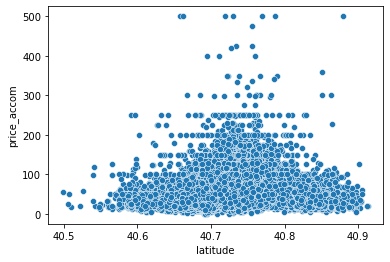

In [66]:
sns.scatterplot(data=listings, x='latitude', y='price_accom')

Text(0.5, 1.0, 'Scatter of Location vs Price')

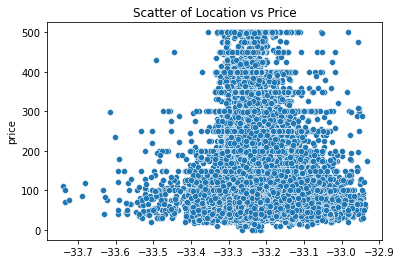

In [33]:
sns.scatterplot(data=listings, x=listings['latitude']+listings['longitude'], y='price')
plt.title('Scatter of Location vs Price')

##### because of this analysis we created loc_sum (sum of longitude and latitude)

(0.0, 300.0)

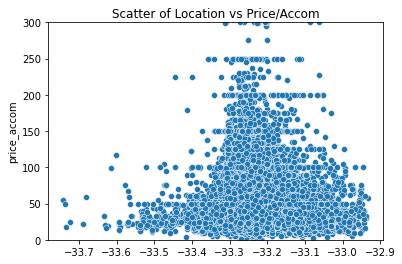

In [71]:
sns.scatterplot(data=listings, x=loc_sum, y='price_accom')
plt.title('Scatter of Location vs Price/Accom')
plt.ylim(0, 300)

**Q**: Can you play around with other conditions to find out which listings have higher/lower prices?

# SUPERHOST OBSERVATIONS 

## Super hosts vs non-superhosts

## C - BOXPLOTS - REVIEWS

In [ ]:
# 'number_of_reviews_ltm',
 #'review_scores_rating',
 #'review_scores_accuracy',
 #'review_scores_cleanliness',
 #'review_scores_checkin',
 #'review_scores_communication',
 #'review_scores_location',
 #'review_scores_value',

### Superhosts get more reviews than other host!

<AxesSubplot:xlabel='host_is_superhost', ylabel='number_of_reviews_ltm'>

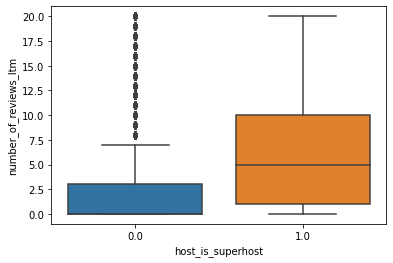

In [94]:
sns.boxplot(data=listings, x='host_is_superhost', y='number_of_reviews_ltm')

### Superhosts get consistently high review_scores_rating

(70.0, 120.0)

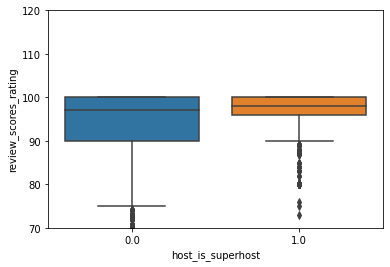

In [102]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_rating')
plt.ylim(70, 120)

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_accuracy'>

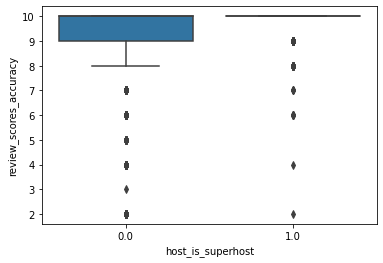

In [104]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_accuracy')


### Cleanliness had no impact

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_cleanliness'>

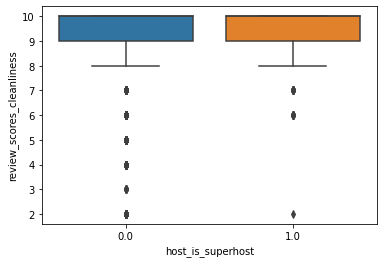

In [97]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_cleanliness')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_checkin'>

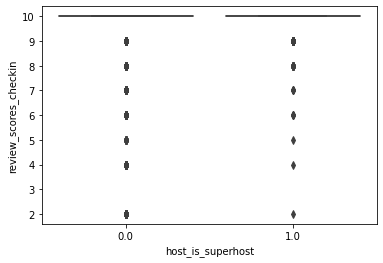

In [98]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_checkin')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_communication'>

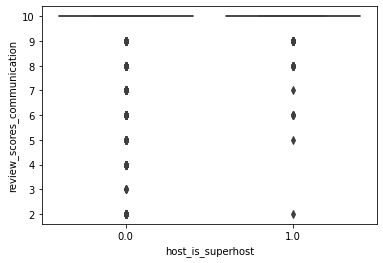

In [99]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_communication')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_location'>

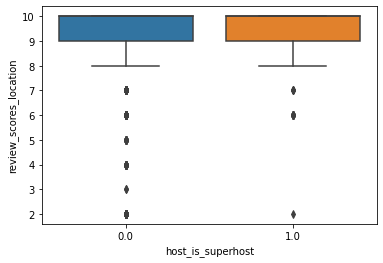

In [100]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_location')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_value'>

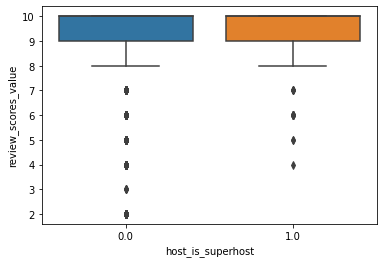

In [101]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_value')


## D REVIEW OF REVIEWS VS PRICE!

### NEED to widen plot above!

# You can only charge more if you getting top review

(0.0, 125.0)

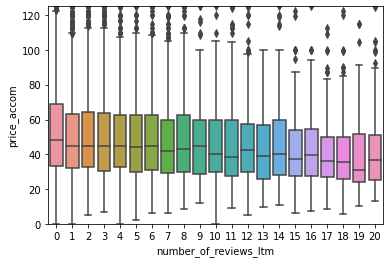

In [129]:
sns.boxplot(data=listings, x='number_of_reviews_ltm', y='price_accom')
plt.ylim(0, 125)
# 'number_of_reviews_ltm',
 #'review_scores_rating',
 #'review_scores_accuracy',
 #'review_scores_cleanliness',
 #'review_scores_checkin',
 #'review_scores_communication',
 #'review_scores_location',
 #'review_scores_value',

(0.0, 125.0)

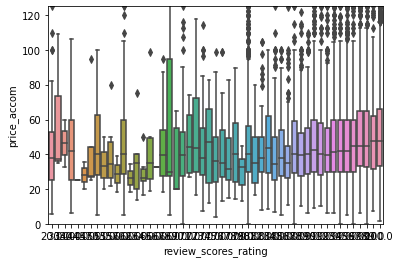

In [112]:
sns.boxplot(data=listings, x='review_scores_rating', y='price_accom')
plt.ylim(0, 125)

(0.0, 125.0)

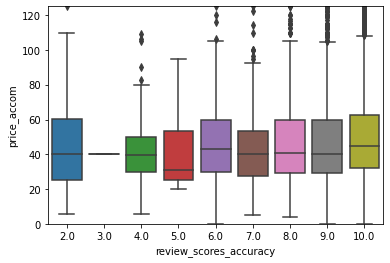

In [114]:
sns.boxplot(data=listings, x='review_scores_accuracy', y='price_accom')
plt.ylim(0, 125)

(0.0, 125.0)

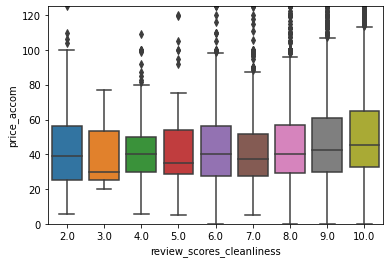

In [118]:
sns.boxplot(data=listings, x='review_scores_cleanliness', y='price_accom')
plt.ylim(0, 125)

(0.0, 125.0)

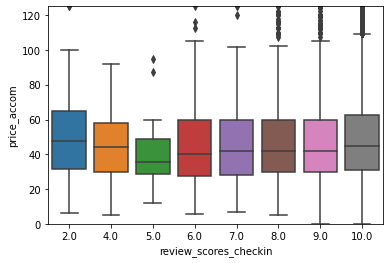

In [120]:
sns.boxplot(data=listings, x='review_scores_checkin', y='price_accom')
plt.ylim(0, 125)

(0.0, 125.0)

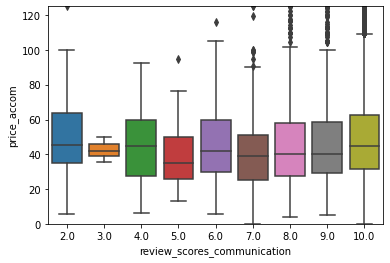

In [95]:
sns.boxplot(data=listings, x='review_scores_communication', y='price_accom')
plt.ylim(0, 125)

(0.0, 125.0)

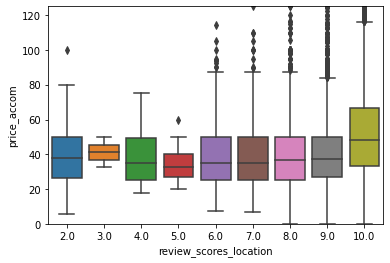

In [123]:
sns.boxplot(data=listings, x='review_scores_location', y='price_accom')
plt.ylim(0, 125)

<AxesSubplot:xlabel='review_scores_value', ylabel='price_accom'>

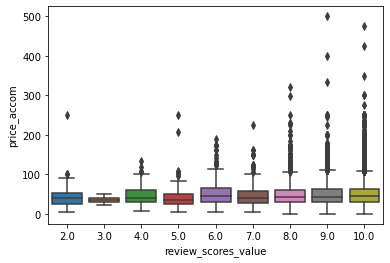

In [33]:
sns.boxplot(data=listings, x='review_scores_value', y='price_accom')

<AxesSubplot:xlabel='review_scores_rating', ylabel='availability_60'>

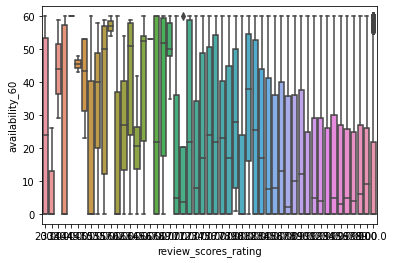

In [42]:
sns.boxplot(data=listings, x='review_scores_rating', y='availability_60')

## E - BOXPLOTS - Superhosts pricing!

# Superhosts charge less!

(0.0, 125.0)

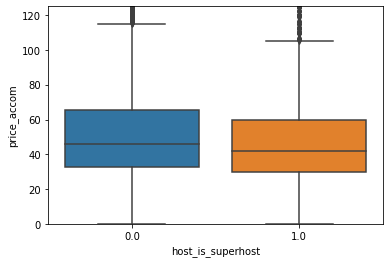

In [142]:
sns.boxplot(data=listings, x='host_is_superhost', y='price_accom')
plt.ylim(0, 125)

#### Not normalized

<AxesSubplot:xlabel='long_term_stays', ylabel='price'>

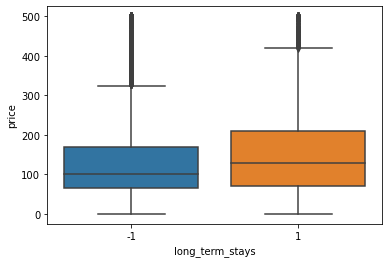

In [171]:
sns.boxplot(data=listings, x='long_term_stays', y='price')

(0.0, 125.0)

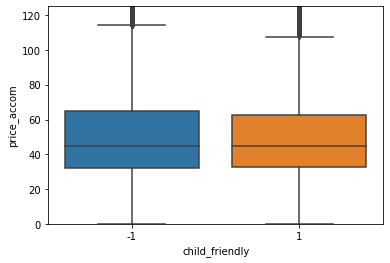

In [146]:
sns.boxplot(data=listings, x='child_friendly', y='price_accom')
plt.ylim(0, 125)

<AxesSubplot:xlabel='child_friendly', ylabel='price'>

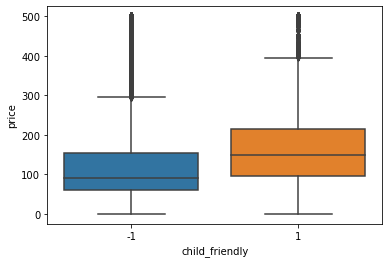

In [43]:
sns.boxplot(data=listings, x='child_friendly', y='price')

<AxesSubplot:xlabel='breakfast', ylabel='price'>

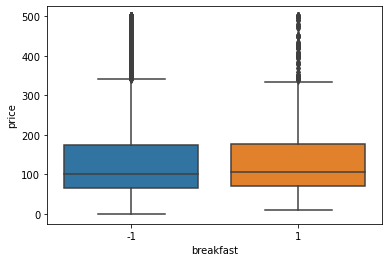

In [16]:
sns.boxplot(data=listings, x='breakfast', y='price')

<AxesSubplot:xlabel='nature_and_views', ylabel='price'>

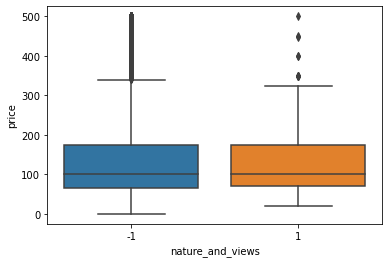

In [147]:
sns.boxplot(data=listings, x='nature_and_views', y='price')

<AxesSubplot:xlabel='balcony', ylabel='price'>

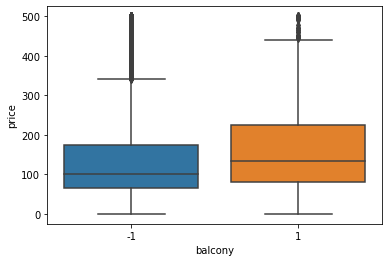

In [151]:
sns.boxplot(data=listings, x='balcony', y='price')

(0.0, 125.0)

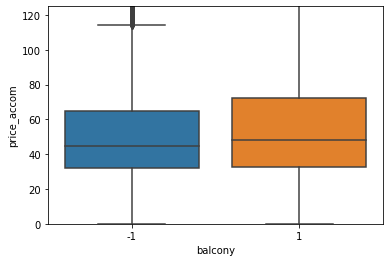

In [150]:
sns.boxplot(data=listings, x='balcony', y='price_accom')
plt.ylim(0, 125)

### I think there is a discrepancy here! The zero values may have skewed the data!

<AxesSubplot:xlabel='host_is_superhost', ylabel='availability_365'>

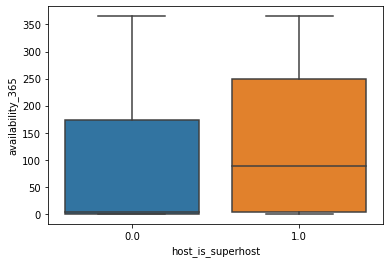

In [37]:
sns.boxplot(data=listings, x='host_is_superhost', y='availability_365')

### Going to remove zeros from availability_365

In [ ]:
#avail_365 = listings['availability_365']
#df.dropna(subset=[1]) 
#df1 = df.iloc[1:]
#df.loc[~(df==0).all(axis=1)]
#df2 = df.loc[df["Fee"] >= 24000 ]

In [62]:
listings_new_30 = listings.loc[listings['availability_30'] != 0]
listings_new_60 = listings.loc[listings['availability_60'] != 0]
listings_new_90 = listings.loc[listings['availability_90'] != 0]
listings_new_365 = listings.loc[listings['availability_365'] != 0]
listings_new_all = listings.loc[(listings['availability_30'] != 0) & (listings['availability_60'] != 0) & (listings['availability_90'] != 0) & (listings['availability_365'] != 0)]

<AxesSubplot:xlabel='host_is_superhost', ylabel='availability_30'>

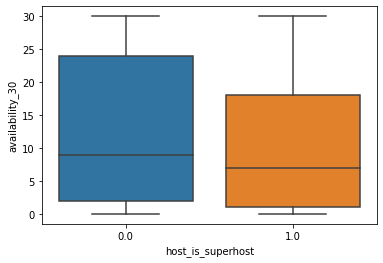

In [56]:
sns.boxplot(data=listings_new, x='host_is_superhost', y='availability_30')

<AxesSubplot:xlabel='host_is_superhost', ylabel='availability_60'>

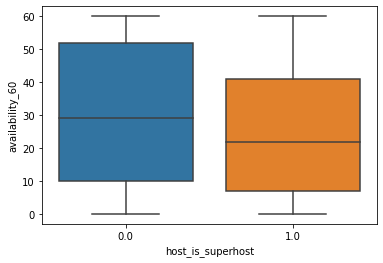

In [59]:
sns.boxplot(data=listings_new, x='host_is_superhost', y='availability_60')

<AxesSubplot:xlabel='host_is_superhost', ylabel='availability_90'>

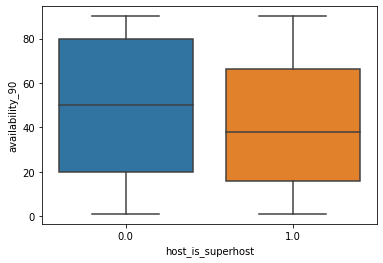

In [79]:
sns.boxplot(data=listings_new_90, x='host_is_superhost', y='availability_90')

<AxesSubplot:xlabel='host_is_superhost', ylabel='availability_365'>

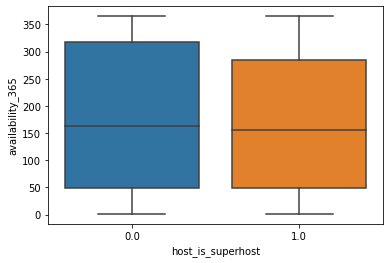

In [78]:
sns.boxplot(data=listings_new_365, x='host_is_superhost', y='availability_365')

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_rating'>

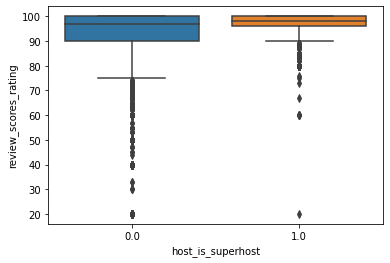

In [40]:
sns.boxplot(data=listings, x='host_is_superhost', y='review_scores_rating')

# CORRELATION DRAFT -LEARNING

**Q**: Can create correlation among ```price``` ```number_of_reviews``` ```review_scores_rating```?

In [152]:
listings[['price', 'number_of_reviews', 'review_scores_rating']].corr()

,price,number_of_reviews,review_scores_rating
price,1.000000,-0.029229,0.064228
number_of_reviews,-0.029229,1.000000,0.066106
review_scores_rating,0.064228,0.066106,1.000000


In [154]:
listings[['price_accom', 'number_of_reviews', 'review_scores_rating']].corr()

,price_accom,number_of_reviews,review_scores_rating
price_accom,1.000000,-0.088986,0.079520
number_of_reviews,-0.088986,1.000000,0.066106
review_scores_rating,0.079520,0.066106,1.000000


**Q**: Which factors are most correlated with price (positive or negative)? Which correlations are surprising, and what do you hypothesize might explain them?

In [131]:
listings[['rate_accom', 'host_since',
 'host_response_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'check_in_24h',
 'air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'white_goods',
 'elevator',
 'gym',
 'child_friendly',
 'parking',
 'outdoor_space',
 'host_greeting',
 'hot_tub_sauna_or_pool',
 'internet',
 'long_term_stays',
 'pets_allowed',
 'private_entrance',
 'secure',
 'self_check_in',
 'smoking_allowed',
 'accessible',
 'event_suitable']].corr()

,rate_accom,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
rate_accom,1.000000,-0.066080,-0.049148,-0.047039,0.178237,-0.001402,0.100153,-0.272572,-0.228794,-0.065272,...,0.062836,-0.020030,0.023937,0.017356,-0.016930,-0.005152,-0.007045,-0.015660,0.005561,-0.014909
host_since,-0.066080,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,...,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,-0.049148,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,0.041781,...,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,-0.047039,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,...,-0.018348,0.030957,0.136806,-0.021250,0.080201,0.048612,0.123705,-0.025842,0.042958,-0.011303
host_listings_count,0.178237,0.056799,0.071515,-0.021501,1.000000,-0.131024,0.033297,-0.118728,0.024368,0.001284,...,0.068656,0.023664,0.265793,0.217909,0.063058,-0.024161,0.163752,0.000765,-0.029330,-0.001697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secure,-0.005152,-0.033657,-0.009455,0.048612,-0.024161,0.030771,-0.008190,0.009031,0.028119,0.059877,...,0.010198,0.017604,0.019094,0.006945,0.025824,1.000000,0.055381,0.003261,0.048724,0.023681
self_check_in,-0.007045,0.027736,0.112369,0.123705,0.163752,-0.024953,-0.063903,0.024616,0.145485,0.068656,...,0.011348,0.044626,0.198486,0.046163,0.160687,0.055381,1.000000,-0.024765,0.051577,0.003632
smoking_allowed,-0.015660,0.017108,-0.043715,-0.025842,0.000765,-0.010547,-0.012216,0.046009,-0.049053,-0.006478,...,0.010449,-0.038682,-0.021062,0.141324,-0.013995,0.003261,-0.024765,1.000000,0.019262,0.201513
accessible,0.005561,-0.038432,0.019444,0.042958,-0.029330,0.041090,0.028615,0.031948,0.048473,0.004377,...,0.048509,0.019621,0.120317,0.037936,0.028427,0.048724,0.051577,0.019262,1.000000,0.033365


# START OF CORRELATION REVIEW

In [24]:
corrm = listings.corr()
corrm


,id,price_accom_loc,price_accom,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,-0.055597,-0.055830,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,...,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
price_accom_loc,-0.055597,1.000000,0.999977,-0.063159,-0.065408,-0.049171,-0.046919,0.177846,-0.001810,0.104737,...,0.062930,-0.020249,0.023955,0.017186,-0.017019,-0.005149,-0.007320,-0.015582,0.005766,-0.014967
price_accom,-0.055830,0.999977,1.000000,-0.063714,-0.066080,-0.049148,-0.047039,0.178237,-0.001402,0.100153,...,0.062836,-0.020030,0.023937,0.017356,-0.016930,-0.005152,-0.007045,-0.015660,0.005561,-0.014909
host_id,0.567767,-0.063159,-0.063714,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,...,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,-0.065408,-0.066080,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,...,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secure,-0.062950,-0.005149,-0.005152,-0.051488,-0.033657,-0.009455,0.048612,-0.024161,0.030771,-0.008190,...,0.010198,0.017604,0.019094,0.006945,0.025824,1.000000,0.055381,0.003261,0.048724,0.023681
self_check_in,0.143029,-0.007320,-0.007045,0.039264,0.027736,0.112369,0.123705,0.163752,-0.024953,-0.063903,...,0.011348,0.044626,0.198486,0.046163,0.160687,0.055381,1.000000,-0.024765,0.051577,0.003632
smoking_allowed,0.002802,-0.015582,-0.015660,0.000612,0.017108,-0.043715,-0.025842,0.000765,-0.010547,-0.012216,...,0.010449,-0.038682,-0.021062,0.141324,-0.013995,0.003261,-0.024765,1.000000,0.019262,0.201513
accessible,-0.074635,0.005766,0.005561,-0.033810,-0.038432,0.019444,0.042958,-0.029330,0.041090,0.028615,...,0.048509,0.019621,0.120317,0.037936,0.028427,0.048724,0.051577,0.019262,1.000000,0.033365


In [25]:
pos_cor = corrm['price']>0
corrm['price'][pos_cor].sort_values(ascending=False).to_frame()

,price
price,1.000000
accommodates,0.571541
price_accom,0.540454
price_accom_loc,0.539909
bedrooms,0.454539
beds,0.421355
guests_included,0.321970
tv,0.271563
elevator,0.229610
calculated_host_listings_count_entire_homes,0.218890


In [157]:
neg_cor = corrm['price']<0
corrm['price'][neg_cor].sort_values(ascending=True).to_frame()

,price
longitude,-0.294196
calculated_host_listings_count_private_rooms,-0.127504
calculated_host_listings_count_shared_rooms,-0.101389
smoking_allowed,-0.054131
host_greeting,-0.051356
number_of_reviews,-0.029229
host_identity_verified,-0.022861
parking,-0.019383
host_is_superhost,-0.016325
number_of_reviews_ltm,-0.011481


In [159]:
pos_cor = corrm['price_accom']>0
corrm['price_accom'][pos_cor].sort_values(ascending=False).to_frame()

,price_accom
price_accom,1.000000
price_accom_loc,0.999977
price,0.540454
elevator,0.188159
host_listings_count,0.178237
gym,0.178151
review_scores_location,0.151978
calculated_host_listings_count_entire_homes,0.135281
calculated_host_listings_count,0.117079
tv,0.103764


In [161]:
neg_cor = corrm['price_accom']<0
corrm['price_accom'][neg_cor].sort_values(ascending=True).to_frame()

,price_accom
longitude,-0.272572
accommodates,-0.228794
beds,-0.149173
bedrooms,-0.100055
parking,-0.094569
number_of_reviews_ltm,-0.093857
number_of_reviews,-0.088986
reviews_per_month,-0.083202
guests_included,-0.074221
host_since,-0.066080


In [162]:
pos_cor = corrm['host_is_superhost']>0
corrm['host_is_superhost'][pos_cor].sort_values(ascending=False).to_frame()

,host_is_superhost
host_is_superhost,1.000000
number_of_reviews_ltm,0.278945
number_of_reviews,0.246618
calculated_host_listings_count_private_rooms,0.199202
parking,0.179669
bed_linen,0.142496
coffee_machine,0.137013
long_term_stays,0.136806
cooking_basics,0.134466
host_response_rate,0.133280


In [163]:
neg_cor = corrm['host_is_superhost']<0
corrm['host_is_superhost'][neg_cor].sort_values(ascending=True).to_frame()

,host_is_superhost
elevator,-0.051817
price_accom,-0.047039
price_accom_loc,-0.046919
calculated_host_listings_count_entire_homes,-0.041604
gym,-0.027200
smoking_allowed,-0.025842
host_listings_count,-0.021501
pets_allowed,-0.021250
hot_tub_sauna_or_pool,-0.018348
latitude,-0.017228


In [26]:
pos_cor = corrm['review_scores_location']>0
corrm['review_scores_location'][pos_cor].sort_values(ascending=False).to_frame()

,review_scores_location
review_scores_location,1.000000
review_scores_value,0.486660
review_scores_rating,0.479528
review_scores_accuracy,0.434866
review_scores_communication,0.420720
review_scores_checkin,0.385962
review_scores_cleanliness,0.362374
price_accom,0.151978
price_accom_loc,0.151577
price,0.140308


# Newer hosts get better reviews
# Higher your reviews your occupancy rate increases!
## Hot tub/sauna lower reviews! stay away!


## Superhost not a predictor of review score rating or occupancy! tres strange!

In [165]:
neg_cor = corrm['review_scores_rating']<0
corrm['review_scores_rating'][neg_cor].sort_values(ascending=True).to_frame()

,review_scores_rating
availability_365,-0.100241
availability_90,-0.097939
availability_60,-0.092760
host_since,-0.090009
availability_30,-0.085092
host_id,-0.082189
smoking_allowed,-0.064528
calculated_host_listings_count_private_rooms,-0.062598
calculated_host_listings_count_shared_rooms,-0.056665
minimum_nights,-0.050754


In [168]:
pos_cor = corrm['price_accom_loc']>0
corrm['price_accom_loc'][pos_cor].sort_values(ascending=False).to_frame()

,price_accom_loc
price_accom_loc,1.000000
price_accom,0.999977
price,0.539909
elevator,0.188536
gym,0.177964
host_listings_count,0.177846
review_scores_location,0.151577
calculated_host_listings_count_entire_homes,0.134768
calculated_host_listings_count,0.116632
latitude,0.104737


In [27]:
neg_cor = corrm['availability_365']<0
corrm['availability_365'][neg_cor].sort_values(ascending=True).to_frame()

,availability_365
host_identity_verified,-0.190038
review_scores_value,-0.140808
review_scores_communication,-0.121714
review_scores_accuracy,-0.118321
review_scores_rating,-0.100241
review_scores_checkin,-0.084072
review_scores_location,-0.058486
host_response_rate,-0.043331
child_friendly,-0.037689
smoking_allowed,-0.015533


# NEW CORRELATION with zero values removed from availablity

## Now correlation between occupancy and review rating is correlated to superhost!

In [63]:
corrm_new = listings_new_all.corr()
corrm_new

,id,price_accom_loc,price_accom,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,-0.114051,-0.114008,0.522820,0.522776,0.131875,-0.058159,-0.037655,-0.317652,0.004121,...,-0.035309,0.006059,-0.018127,-0.084789,0.161294,-0.114498,0.008845,-0.007914,-0.099143,0.011128
price_accom_loc,-0.114051,1.000000,0.999973,-0.105286,-0.107784,-0.089898,-0.052449,0.122550,0.031186,0.113640,...,0.076842,-0.032579,-0.000259,0.036828,-0.062241,-0.006961,-0.049844,0.004944,-0.010162,-0.013030
price_accom,-0.114008,0.999973,1.000000,-0.105625,-0.108249,-0.089839,-0.052495,0.123065,0.031450,0.109096,...,0.076802,-0.032332,-0.000107,0.036943,-0.062087,-0.007035,-0.049329,0.004799,-0.010451,-0.012940
host_id,0.522820,-0.105286,-0.105625,1.000000,0.927601,0.054699,-0.077348,-0.004535,-0.487049,0.016590,...,-0.021798,-0.015851,0.018158,-0.064133,0.098636,-0.075866,-0.037345,-0.012582,-0.051818,0.000997
host_since,0.522776,-0.107784,-0.108249,0.927601,1.000000,0.051447,-0.066653,0.025518,-0.492634,0.019111,...,-0.011103,-0.017171,0.023433,-0.059675,0.091172,-0.058114,-0.030322,0.001589,-0.054746,0.002091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secure,-0.114498,-0.006961,-0.007035,-0.075866,-0.058114,-0.010503,0.067793,-0.014869,0.022180,-0.014375,...,0.019499,0.015608,0.031638,-0.008237,0.029785,1.000000,0.076507,0.004862,0.043307,0.024763
self_check_in,0.008845,-0.049844,-0.049329,-0.037345,-0.030322,0.124443,0.087737,0.171145,0.024335,-0.089433,...,0.010239,0.052470,0.165510,0.031070,0.107869,0.076507,1.000000,-0.034105,0.048630,-0.004386
smoking_allowed,-0.007914,0.004944,0.004799,-0.012582,0.001589,-0.057098,-0.028976,-0.014824,-0.013164,0.000171,...,0.013372,-0.051178,-0.020102,0.157548,-0.021531,0.004862,-0.034105,1.000000,0.023791,0.225700
accessible,-0.099143,-0.010162,-0.010451,-0.051818,-0.054746,0.022632,0.061244,-0.040448,0.054954,0.014714,...,0.025101,0.019352,0.163228,0.025746,0.034397,0.043307,0.048630,0.023791,1.000000,0.031345


In [75]:
neg_cor = corrm_new['availability_365']<0
corrm_new['availability_365'][neg_cor].sort_values(ascending=True).to_frame()

,availability_365
review_scores_value,-0.158841
review_scores_accuracy,-0.144121
review_scores_rating,-0.140842
review_scores_communication,-0.127729
host_identity_verified,-0.105403
review_scores_location,-0.105086
number_of_reviews_ltm,-0.103969
id,-0.103529
review_scores_checkin,-0.103316
number_of_reviews,-0.086021


In [68]:
neg_cor = corrm_new['host_is_superhost']<0
corrm_new['host_is_superhost'][neg_cor].sort_values(ascending=True).to_frame()

,host_is_superhost
availability_30,-0.084211
availability_60,-0.082536
host_id,-0.077348
availability_90,-0.077263
host_since,-0.066653
calculated_host_listings_count_entire_homes,-0.064621
elevator,-0.062940
id,-0.058159
price_accom,-0.052495
price_accom_loc,-0.052449


In [74]:
pos_cor = corrm_new['host_is_superhost']>0
corrm_new['host_is_superhost'][pos_cor].sort_values(ascending=False).to_frame()

,host_is_superhost
host_is_superhost,1.000000
number_of_reviews,0.237944
number_of_reviews_ltm,0.234955
calculated_host_listings_count_private_rooms,0.148355
parking,0.139603
review_scores_rating,0.138670
review_scores_cleanliness,0.134608
host_response_rate,0.130718
review_scores_accuracy,0.126431
review_scores_value,0.123431


In [70]:
pos_cor = corrm_new['review_scores_rating']>0
corrm_new['review_scores_rating'][pos_cor].sort_values(ascending=False).to_frame()

,review_scores_rating
review_scores_rating,1.000000
review_scores_accuracy,0.790856
review_scores_value,0.788687
review_scores_cleanliness,0.749208
review_scores_communication,0.712801
review_scores_checkin,0.643499
review_scores_location,0.530893
host_is_superhost,0.138670
white_goods,0.105987
cooking_basics,0.085832


In [71]:
neg_cor = corrm_new['review_scores_rating']<0
corrm_new['review_scores_rating'][neg_cor].sort_values(ascending=True).to_frame()

,review_scores_rating
availability_90,-0.156606
availability_60,-0.151884
availability_365,-0.140842
availability_30,-0.139143
host_since,-0.103785
host_id,-0.095066
calculated_host_listings_count_private_rooms,-0.093707
instant_bookable,-0.067616
calculated_host_listings_count_shared_rooms,-0.059784
beds,-0.048564


In [72]:
pos_cor = corrm_new['price']>0
corrm_new['price'][pos_cor].sort_values(ascending=False).to_frame()

,price
price,1.000000
accommodates,0.568115
price_accom,0.506742
price_accom_loc,0.506052
bedrooms,0.469004
beds,0.411196
guests_included,0.361994
tv,0.259659
elevator,0.235520
white_goods,0.227806


In [73]:
neg_cor = corrm_new['price']<0
corrm_new['price'][neg_cor].sort_values(ascending=True).to_frame()

,price
longitude,-0.294553
calculated_host_listings_count_shared_rooms,-0.144197
calculated_host_listings_count_private_rooms,-0.140444
host_greeting,-0.081496
number_of_reviews_ltm,-0.065802
number_of_reviews,-0.064111
parking,-0.051506
smoking_allowed,-0.047043
host_is_superhost,-0.032593
availability_30,-0.022431


# Trying to date the data

In [106]:
listings['host_since'].describe() 

count    30170.000000
mean     42160.939211
std        841.819786
min      39698.000000
25%      41552.000000
50%      42141.500000
75%      42787.000000
max      43653.000000
Name: host_since, dtype: float64

# Oh no I wrote over Listings! Just import it again.

In [121]:
listings['host_since'].describe() 

/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_93318/2716820052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings['host_since'].describe()


count                   30170
unique                   3417
top       2018-10-10 00:00:00
freq                      250
first     2008-09-09 00:00:00
last      2019-07-09 00:00:00
Name: host_since, dtype: object

# Below can only be done once! So error if refresh

In [120]:
# converting the float to datetime format 
import datetime as dt
listings_dat = listings
listings_dat['host_since'] = pd.TimedeltaIndex(listings_dat['host_since'], unit='d') + dt.datetime(1900,1,1)

  
# printing dataframe 
listings_dat['host_since'].dtypes
  
listings_dat['host_since'].describe()

TypeError: dtype datetime64[ns] cannot be converted to timedelta64[ns]

In [119]:
listings_date['host_since'].dtypes
listings_date['host_since'].describe() 
#/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_93318/4235128574.py:2: 
#FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated 
#and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this 
#warning and adopt the future behavior now.
listings_date['host_since'].describe()

/var/folders/m6/fxj587w93gn106xqhsxs8g7r0000gn/T/ipykernel_93318/4235128574.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  listings_date['host_since'].describe()


count                   30170
unique                   3417
top       2018-10-10 00:00:00
freq                      250
first     2008-09-09 00:00:00
last      2019-07-09 00:00:00
Name: host_since, dtype: object

## References

[1]"New York", Inside Airbnb, http://insideairbnb.com/get-the-data.html

[2] Summaries https://docs.google.com/spreadsheets/d/1QjXSTLijmvaxipUHpPq2tv8YKOmaC3nXYw6SUxg9rUI/edit?usp=sharing

[3] diagrams https://docs.google.com/document/d/14ydefXbLqhyUV8ncAxQgh89VP0dwZ5Bl0ldSx9l9P2Q/edit?usp=sharing

